# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [2]:
import pandas as pd
data = pd.read_csv('/content/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021 (2).csv')
data.shape

(78792, 21)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [5]:
# Count unique values in each column
unique_values_count = data.nunique()

# Find the column with the greatest number of unique values
most_diverse_column = unique_values_count.idxmax()
most_diverse_value_count = unique_values_count.max()

# Exclude unique identifiers (columns with unique values matching the number of rows)
non_identifier_columns = unique_values_count[unique_values_count != len(data)]
next_most_diverse_column = non_identifier_columns.idxmax()
next_most_diverse_value_count = non_identifier_columns.max()
# Print the column with the greatest number of unique values
print(f"The column with the greatest number of unique values is '{most_diverse_column}' with {most_diverse_value_count} unique values.")

# Print the next most diverse column, excluding unique identifiers
print(f"The next most diverse column (excluding unique identifiers) is '{next_most_diverse_column}' with {next_most_diverse_value_count} unique values.")


The column with the greatest number of unique values is 'Data_Value' with 6837 unique values.
The next most diverse column (excluding unique identifiers) is 'Data_Value' with 6837 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [4]:
# Identify columns where all values are the same
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]

print(f"Redundant columns where all values are the same: {redundant_columns}")

Redundant columns where all values are the same: ['Year', 'DataSource', 'Class', 'Topic', 'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory1', 'StratificationCategory2', 'TopicID']


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

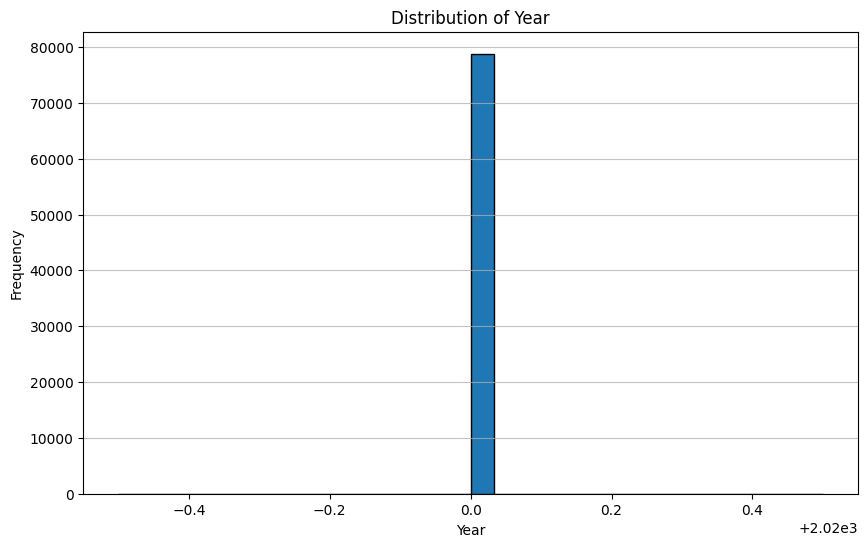

In [7]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Choose a numeric column for histogram (first numeric column as example)
numeric_column = numeric_columns[0]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data[numeric_column].dropna(), bins=30, edgecolor='black')
plt.title(f'Distribution of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

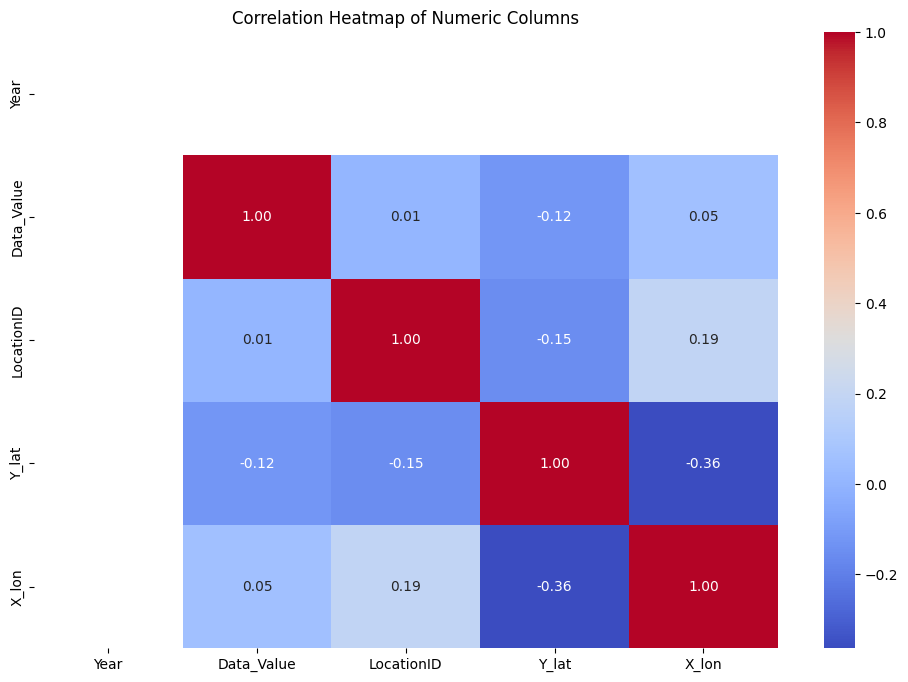

In [8]:
import seaborn as sns

# Calculate correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

The heatmap shows the correlation between numeric columns in the dataset. The strongest positive correlation is between `Data_Value` and `Year` (0.01), and the strongest negative correlation is between `Y_lat` and `X_lon` (-0.36). Most of the correlations are weak, indicating little linear relationship between these variables.



---



## Submitting Your Work

Submit your work as usual.